In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
bank= pd.read_csv("C:/Users/Guest User/Downloads/Bank_Personal_Loan_Modelling.csv")

In [3]:
bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [4]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [5]:
count =bank.iloc[:,7].value_counts(dropna= False)

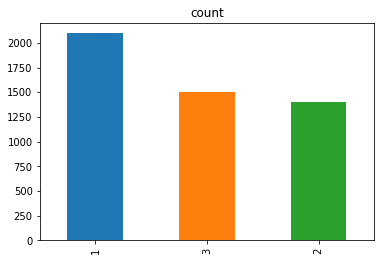

In [6]:
count.plot(kind = "bar", title = "count")

In [7]:
bank_Age = bank[bank.Experience >= 0].groupby('Age').Experience.median().to_frame('Experience Median').reindex()
bank = pd.merge(bank, bank_Age, on = "Age", how = "left")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience Median
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1.0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,20.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,14.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,10.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,10.0


In [8]:
bank.loc[bank.Experience < 0,'Experience'] = np.round(bank["Experience Median"])
bank.head()
bank.loc[bank.Experience.isnull(),"Experience"]= 0

In [9]:
bank['Education']=bank['Education'].astype("category")
bank["Family"]= bank["Family"].astype("category")

In [10]:
bank.dtypes

ID                       int64
Age                      int64
Experience             float64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
Experience Median      float64
dtype: object

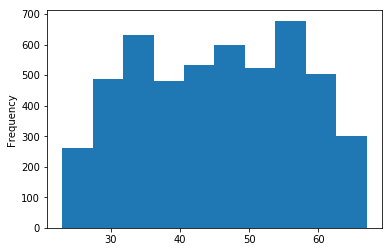

In [11]:
bank.Age.plot("hist")

In [12]:
familydummy = pd.get_dummies(bank['Family'], prefix='Family')
bank_family = pd.concat([bank, familydummy], axis=1)      
bank_family.drop(['Family_4'], inplace=True, axis=1)
bank_family.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience Median,Family_1,Family_2,Family_3
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0,1.0,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0,20.0,0,0,1
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0,14.0,1,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0,10.0,1,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1,10.0,0,0,0


In [13]:
edudummy =  pd.get_dummies(bank_family['Education'], prefix='Education')
bank_edu = pd.concat([bank_family, edudummy], axis=1)      
bank_edu.drop(['Education_3'], inplace=True, axis=1)

In [14]:
list(bank_edu.columns.values)

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Experience Median',
 'Family_1',
 'Family_2',
 'Family_3',
 'Education_1',
 'Education_2']

In [15]:
x = bank_edu[['Age',
 'Income',
 'CCAvg',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Family_1',
 'Family_2',
 'Family_3',
 'Education_1',
 'Education_2']]
y = bank_edu["Personal Loan"]


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0, stratify = y)


In [19]:
from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
from IPython.display import Image
from sklearn.metrics import confusion_matrix
import itertools

from sklearn import tree

from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as gs
from sklearn.tree import DecisionTreeClassifier # A 

In [23]:
gstree = gs.GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                                   param_grid= [{"criterion": ["gini", "entropy"],
                                                 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                                                 "max_features": list(range(1, 11)),
                                                 'min_samples_leaf':[1,2,3,4,5],
                                                 'min_samples_split':[2,3,4,5]
                                                }],
                                   cv = 10,
                                   n_jobs = 4,
                                   scoring='accuracy')
gstree_fit = gstree.fit(x_train, y_train)
y_pred_tree = gstree_fit.predict(x_test)
print(gstree.best_params_)

## best estimator
print("Tree parameters: \n", gstree_fit.best_estimator_)

## best score
print("Best score: ", gstree.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gstree.score(x_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gstree.score(x_test, y_test))

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Tree parameters: 
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
Best score:  0.982
Training score:  0.9982857142857143
Test accuracy:  0.9846666666666667


In [25]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm_fit = svm.fit(x_train,y_train)
y_pred_tree = svm_fit.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy = sum(y_pred_tree == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_tree))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_tree, labels = [0, 1])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.91
The classification error is:  0.09
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1356
           1       0.61      0.10      0.17       144

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.76      0.55      0.56      1500
weighted avg       0.88      0.91      0.88      1500

The Confusion matrix: 
 [[1347    9]
 [ 130   14]]


In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
gsknn = KNeighborsClassifier()
y_pred= gsknn.fit(x_train_std,y_train).predict(x_test_std)
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 5))
print("The classification error is: ", round(error, 5))
print(classification_report(y_test, y_pred))

The predictive accuracy is:  0.95667
The classification error is:  0.04333
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.98      0.56      0.71       144

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.97      0.78      0.85      1500
weighted avg       0.96      0.96      0.95      1500



In [35]:
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train_std,y_train)
    scores.append(knn_n.score(x_test_std,y_test))
    

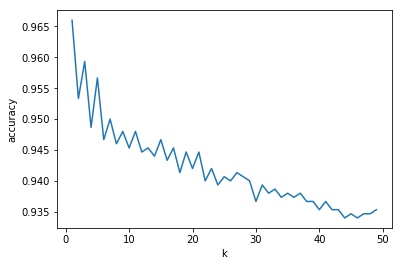

In [36]:
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()


In [37]:
from sklearn.neighbors import KNeighborsClassifier
gsknn = KNeighborsClassifier(n_neighbors=1)
y_pred= gsknn.fit(x_train_std,y_train).predict(x_test_std)
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 5))
print("The classification error is: ", round(error, 5))

The predictive accuracy is:  0.966
The classification error is:  0.034


In [42]:
from sklearn import neighbors, datasets
gsknn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)

gsknn_fit = gsknn.fit(x_train_std, y_train)          
y_pred= gsknn_fit.predict(x_test_std)
from sklearn.neighbors import KNeighborsClassifier
gsknn = KNeighborsClassifier(n_neighbors=1)
y_pred= gsknn.fit(x_train_std,y_train).predict(x_test_std)
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 8))
print("The classification error is: ", round(error, 8))

The predictive accuracy is:  0.966
The classification error is:  0.034
